In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift
from scipy.signal import freqz

<font size = 6> FIR filter

In [384]:
def Low_Pass_FIR(x, N, Fs, cutoff_freq):

    n = np.arange(N + 1)
    window = 0.42 - 0.5*np.cos((2*np.pi*n)/(N-1)) + 0.08*np.cos((4*np.pi*n)/(N-1)) #Blackman window

    M = N//2
    wc = 2*np.pi*cutoff_freq/Fs

    hd = np.zeros(N+1)

    for i in range(N+1):
        if(i == M):
            hd[i] = wc/np.pi
        else:
            hd[i] = np.sin(wc*(i-M))/(np.pi*(i-M))

    h = hd * window
    
    filtered = np.convolve(x, h)

    H = abs(fft(h))
    x_axis, H = freqz(h, fs = Fs)
    phase = np.unwrap(np.angle(H))

    figure1, ax1 = plt.subplots(2, 2, figsize = (18, 12))
    ax1[0][0].plot(x_axis, 20*np.log10(abs(H)))
    ax1[0][0].set_xlabel('f (Hz)', fontsize = 15)
    ax1[0][0].set_ylabel(r'$|H(e^{j\omega})|$', fontsize = 15)
    ax1[0][0].set_xlim(0, 1000)
    ax1[0][0].set_ylim(-100, 0)
    ax1[0][0].grid(True)

    ax1[0][1].plot(x_axis, phase)
    ax1[0][1].set_xlabel('f (Hz)', fontsize = 15)
    ax1[0][1].set_ylabel(r'$\angle H(e^{j\omega})$', fontsize = 15)
    ax1[0][1].set_xlim(0, 1000)
    ax1[0][1].set_ylim(-140, 0)
    ax1[0][1].grid(True)

    ax1[1][0].plot(x_axis, 20*np.log10(abs(H)))
    ax1[1][0].set_xlabel('f (Hz)', fontsize = 15)
    ax1[1][0].set_ylabel(r'$|H(e^{j\omega})|$', fontsize = 15)
    ax1[1][0].set_xlim(0, 100)
    ax1[1][0].set_ylim(-1, 0.2)
    ax1[1][0].grid(True)

    ax1[1][1].plot(x_axis, phase)
    ax1[1][1].set_xlabel('f (Hz)', fontsize = 15)
    ax1[1][1].set_ylabel(r'$\angle H(e^{j\omega})$', fontsize = 15)
    ax1[1][1].set_xlim(0, 100)
    ax1[1][1].set_ylim(-8, 0)
    ax1[1][1].grid(True)

    return filtered

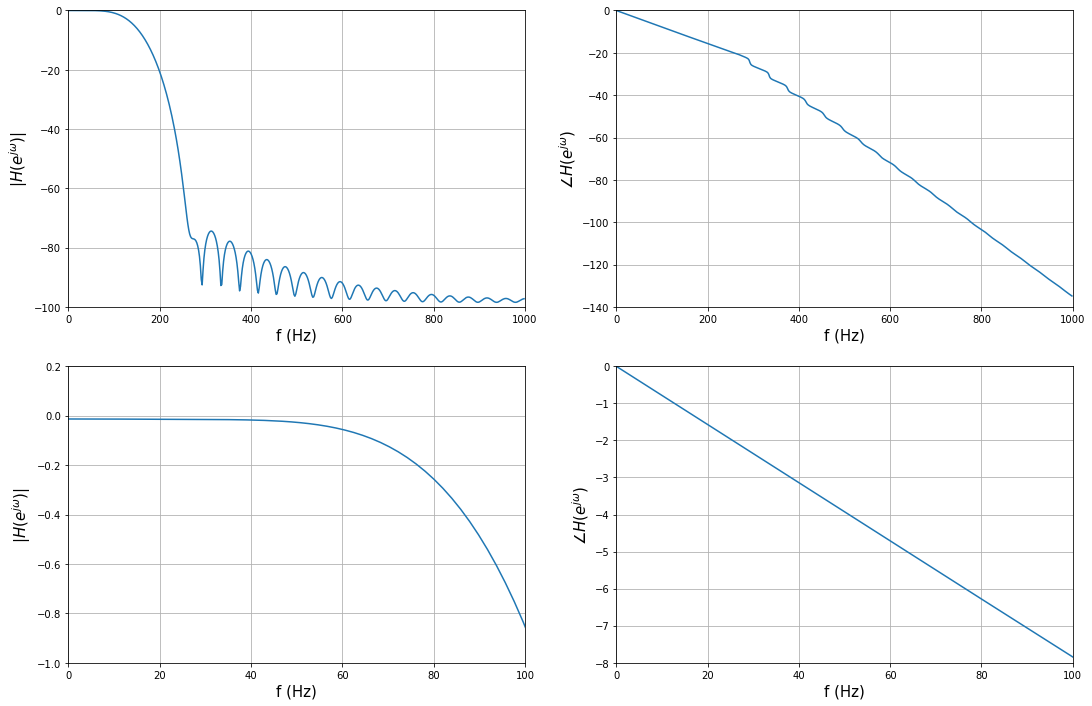

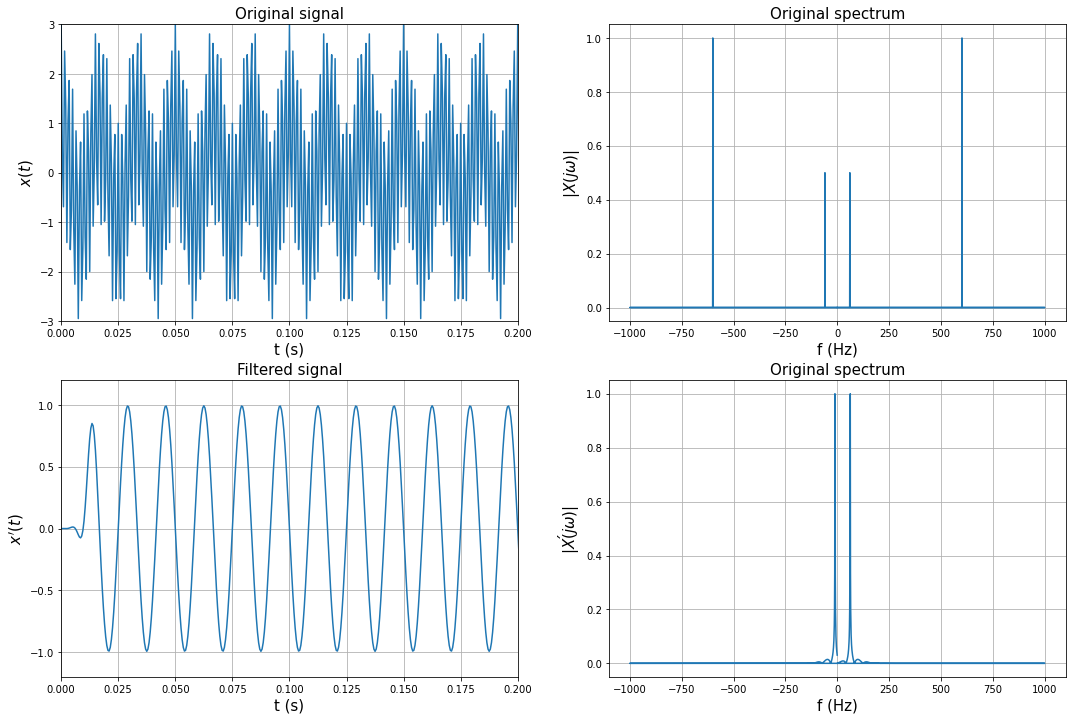

In [395]:
Fs = 2000
N = 50
cutoff_freq = 150

t = np.arange(0, 1, 1/Fs)
x = np.cos(2*np.pi*60*t) + 2*np.cos(2*np.pi*600*t)

filtered = Low_Pass_FIR(x, N, Fs, cutoff_freq)

X = abs(fft(x))
filtered_freq = abs(fft(filtered))
period = t[1] - t[0]
freq = fftfreq(len(x), period)

figure2, ax2 = plt.subplots(2, 2, figsize = (18, 12))

ax2[0][0].plot(t, x)
ax2[0][0].set_xlim(0, 0.2)
ax2[0][0].set_ylim(-3, 3)
ax2[0][0].set_xlabel('t (s)', fontsize = 15)
ax2[0][0].set_ylabel('$x(t)$', fontsize = 15)
ax2[0][0].set_title('Original signal', fontsize = 15)
ax2[0][0].grid(True)

ax2[1][0].plot(t, filtered[:len(t)])
ax2[1][0].set_xlim(0, 0.2)
ax2[1][0].set_ylim(-1.2, 1.2)
ax2[1][0].set_xlabel('t (s)', fontsize = 15)
ax2[1][0].set_ylabel('$x\'(t)$', fontsize = 15)
ax2[1][0].set_title('Filtered signal', fontsize = 15)
ax2[1][0].grid(True)

ax2[0][1].plot(freq, X/X.max())
ax2[0][1].set_xlabel('f (Hz)', fontsize = 15)
ax2[0][1].set_ylabel(r'$|X(j\omega)|$', fontsize = 15)
ax2[0][1].set_title('Original spectrum', fontsize = 15)
ax2[0][1].grid(True)

ax2[1][1].plot(freq, filtered_freq[:len(X)]/filtered_freq.max())
ax2[1][1].set_xlabel('f (Hz)', fontsize = 15)
ax2[1][1].set_ylabel(r'$|X\'(j\omega)|$', fontsize = 15)
ax2[1][1].set_title('Original spectrum', fontsize = 15)
ax2[1][1].grid(True)